<a href="https://www.kaggle.com/code/maciejk111/house-prices-in-poland-data-analysis-with-ml-model?scriptVersionId=128380648" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

**This is my attemp of exploratory data analysis on data set of house pricing of 3 major cities in Poland.** 

First load and put in order the data set that I found on Kaggle

In [2]:
data = pd.read_csv('/kaggle/input/houses1/houses1.csv', encoding='latin-1')

In [3]:
data.head()

,Unnamed: 0,address,city,floor,id,latitude,longitude,price,rooms,sq,year
0,0,Podgórze Zab³ocie Stanis³awa Klimeckiego,Kraków,2,23918,50.049224,19.970379,749000.0,3,74.05,2021
1,1,Praga-Po³udnie Grochowska,Warszawa,3,17828,52.249775,21.106886,240548.0,1,24.38,2021
2,2,Krowodrza Czarnowiejska,Kraków,2,22784,50.066964,19.920025,427000.0,2,37.00,1970
3,3,Grunwald,Poznañ,2,4315,52.404212,16.882542,1290000.0,5,166.00,1935
4,4,Ochota Gotowy budynek. Stan deweloperski. Osta...,Warszawa,1,11770,52.212225,20.972630,996000.0,5,105.00,2020


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23764 entries, 0 to 23763
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  23764 non-null  int64  
 1   address     23764 non-null  object 
 2   city        23764 non-null  object 
 3   floor       23764 non-null  int64  
 4   id          23764 non-null  int64  
 5   latitude    23764 non-null  float64
 6   longitude   23764 non-null  float64
 7   price       23764 non-null  float64
 8   rooms       23764 non-null  int64  
 9   sq          23764 non-null  float64
 10  year        23764 non-null  int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 2.0+ MB


let's see some stats about our data

In [5]:
data.describe()

,Unnamed: 0,floor,id,latitude,longitude,price,rooms,sq,year
count,23764.000000,23764.000000,23764.000000,23764.000000,23764.000000,2.376400e+04,23764.000000,2.376400e+04,23764.00000
mean,11881.500000,2.808744,15621.964484,51.374874,19.861773,6.493536e+05,2.620771,1.027249e+02,2000.55117
std,6860.220235,2.463467,8617.293898,1.099836,1.447186,5.326970e+05,0.996530,6.533688e+03,48.31402
min,0.000000,0.000000,1.000000,49.933056,4.204796,5.000000e+03,1.000000,8.800000e+00,70.00000
25%,5940.750000,1.000000,8420.750000,50.066489,19.916563,4.115461e+05,2.000000,4.200000e+01,1985.00000
50%,11881.500000,2.000000,15637.500000,52.193987,19.999330,5.200000e+05,3.000000,5.389500e+01,2019.00000
75%,17822.250000,4.000000,23111.250000,52.267594,20.996180,6.999990e+05,3.000000,6.891500e+01,2021.00000
max,23763.000000,10.000000,30308.000000,54.435238,30.319403,1.500000e+07,10.000000,1.007185e+06,2980.00000


from now i can see that we have some broken data because apartment with 1007185 sq is rather impossible.

so delete our fake data 

In [6]:
data['sq'].max()

1007185.0

In [7]:
data.drop(columns=['Unnamed: 0', 'id'], inplace=True)

out_sq = data.loc[data['sq'] > 10000].index
data.drop(out_sq, axis=0, inplace=True)

Important features of house pricing are avg room area and price/sq so I will add them quickly

In [8]:
df = data.copy()
df['price_per_sqm'] = df['price'] / df['sq']
df['sqm_per_room'] = df['sq'] / df['rooms']

In [9]:
df.head()

,address,city,floor,latitude,longitude,price,rooms,sq,year,price_per_sqm,sqm_per_room
0,Podgórze Zab³ocie Stanis³awa Klimeckiego,Kraków,2,50.049224,19.970379,749000.0,3,74.05,2021,10114.787306,24.683333
1,Praga-Po³udnie Grochowska,Warszawa,3,52.249775,21.106886,240548.0,1,24.38,2021,9866.611977,24.380000
2,Krowodrza Czarnowiejska,Kraków,2,50.066964,19.920025,427000.0,2,37.00,1970,11540.540541,18.500000
3,Grunwald,Poznañ,2,52.404212,16.882542,1290000.0,5,166.00,1935,7771.084337,33.200000
4,Ochota Gotowy budynek. Stan deweloperski. Osta...,Warszawa,1,52.212225,20.972630,996000.0,5,105.00,2020,9485.714286,21.000000


With my corrected data set let's start visualising in order to gain some insight information about real estate market in those three cities. 

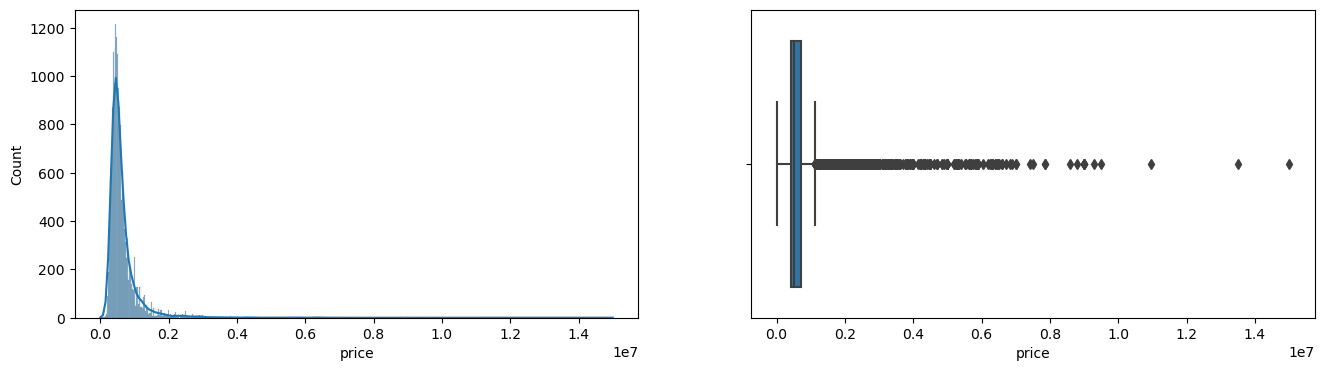

In [10]:
fig, ax = plt.subplots(1,2, figsize=(16,4))
sns.histplot(x=df['price'], data=df, kde=True, ax=ax[0])
sns.boxplot(x=df['price'], data=df, ax=ax[1])
fig.show()

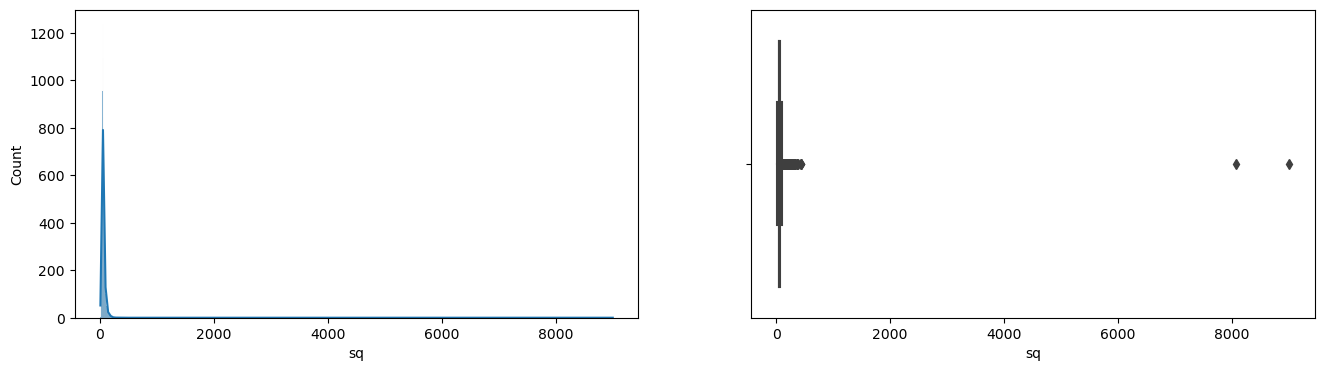

In [11]:
fig, ax = plt.subplots(1,2, figsize=(16,4))
sns.histplot(x=df['sq'], data=df, kde=True, ax=ax[0])
sns.boxplot(x=df['sq'], data=df, ax=ax[1])
fig.show()

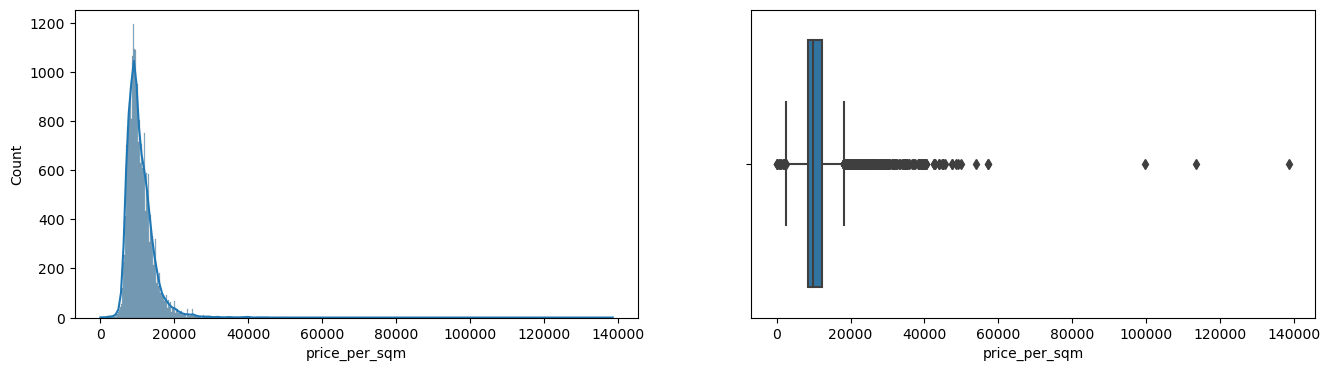

In [12]:
fig, ax = plt.subplots(1,2, figsize=(16,4))
sns.histplot(x=df['price_per_sqm'], data=df, kde=True, ax=ax[0])
sns.boxplot(x=df['price_per_sqm'], data=df, ax=ax[1])
fig.show()

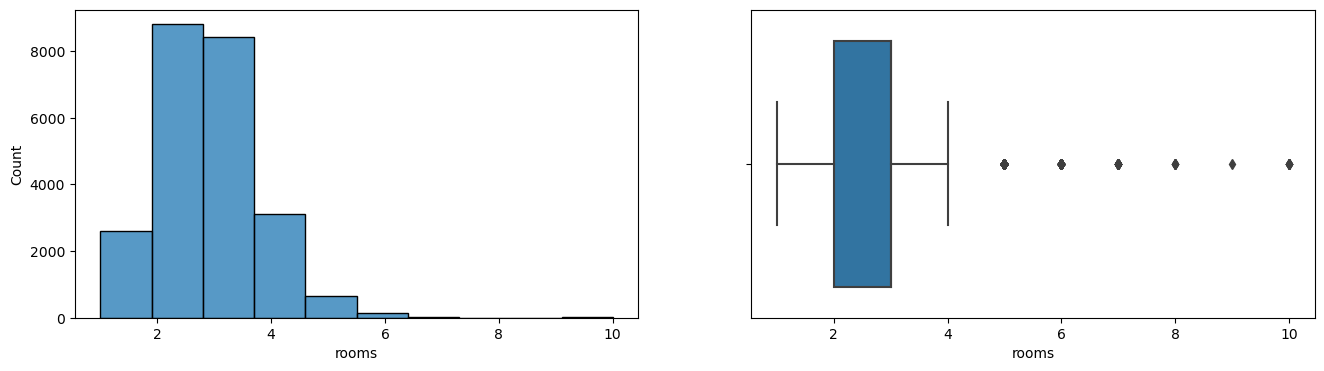

In [13]:
fig, ax = plt.subplots(1,2, figsize=(16,4))
sns.histplot(x=df['rooms'], data=df, bins=10, ax=ax[0])
sns.boxplot(x=df['rooms'], data=df, ax=ax[1])
fig.show()

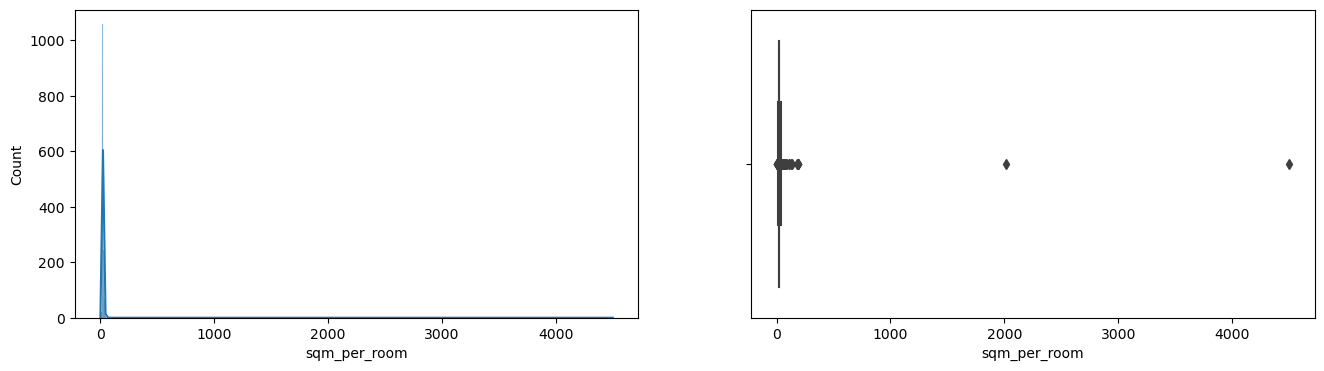

In [14]:
fig, ax = plt.subplots(1,2, figsize=(16,4))
sns.histplot(x=df['sqm_per_room'], data=df, kde=True, ax=ax[0])
sns.boxplot(x=df['sqm_per_room'], data=df, ax=ax[1])
fig.show()

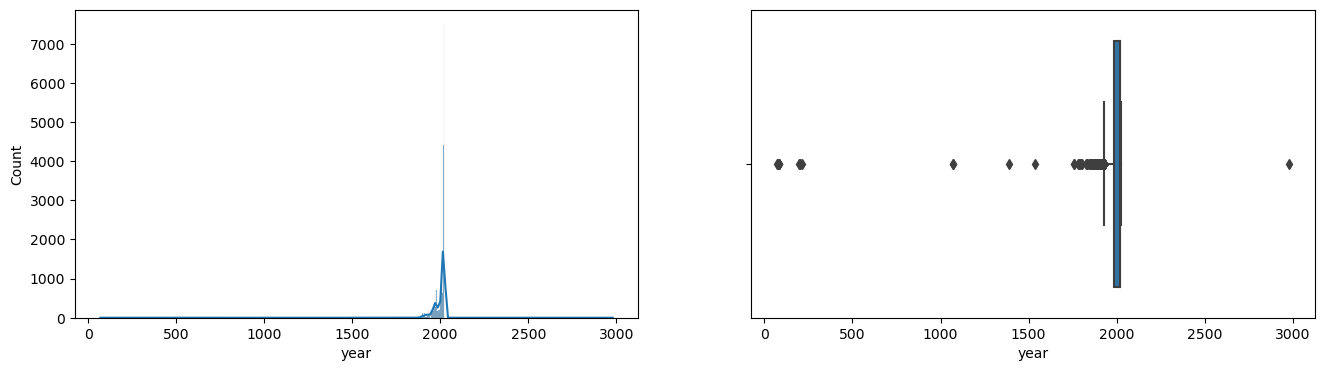

In [15]:
fig, ax = plt.subplots(1,2, figsize=(16,4))
sns.histplot(x=df['year'], data=df, kde=True, ax=ax[0])
sns.boxplot(x=df['year'], data=df, ax=ax[1])
fig.show()

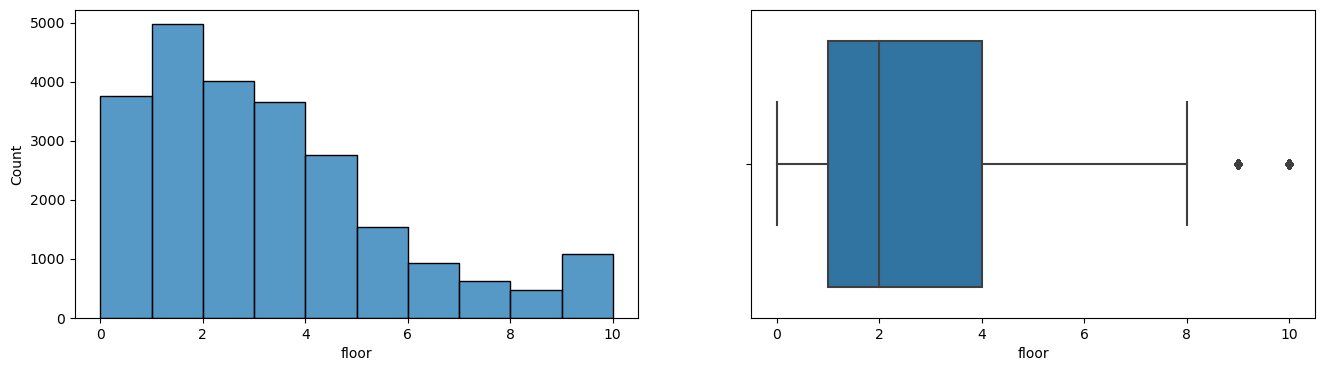

In [16]:
fig, ax = plt.subplots(1,2, figsize=(16,4))
sns.histplot(x=df['floor'], data=df, bins=10, ax=ax[0])
sns.boxplot(x=df['floor'], data=df, ax=ax[1])
fig.show()

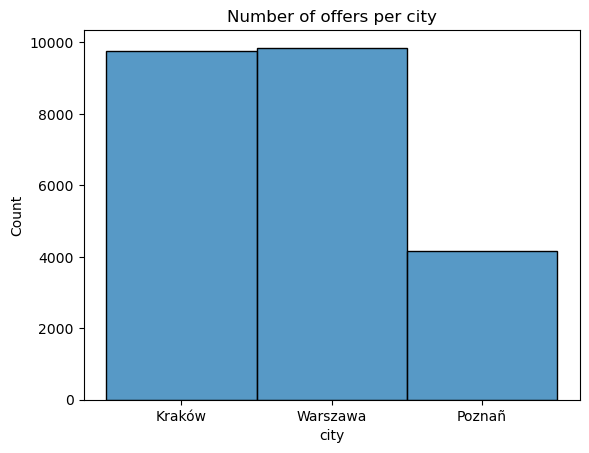

In [17]:
sns.histplot(x=df['city'], data=df)
plt.title("Number of offers per city")
plt.show()

In [18]:
out_sq = df.loc[df['sq'] > 8000].index.tolist()
df.drop(out_sq, axis=0, inplace=True)

# In case of the year some higher values doesn't make sense and I'll limit the house age to around 300 years (we only have two older houses)
out_years = df.loc[(df['year'] > 2030) | (df['year'] < 1700)].index.tolist()
df.drop(out_years, axis=0, inplace=True)

out_price_per_sqm = df.loc[df['price_per_sqm'] > 90000].index.tolist()
df.drop(out_price_per_sqm, axis=0, inplace=True)

In [19]:
cols_to_cap = ['sq', 'year', 'price_per_sqm', 'sqm_per_room']

for col in cols_to_cap:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    upper_bound = q3 + (1.5*iqr)
    lower_bound = q1 - (1.5*iqr)

    df[col] = np.where(df[col] > upper_bound, upper_bound,
                      np.where(df[col] < lower_bound, lower_bound, df[col]))

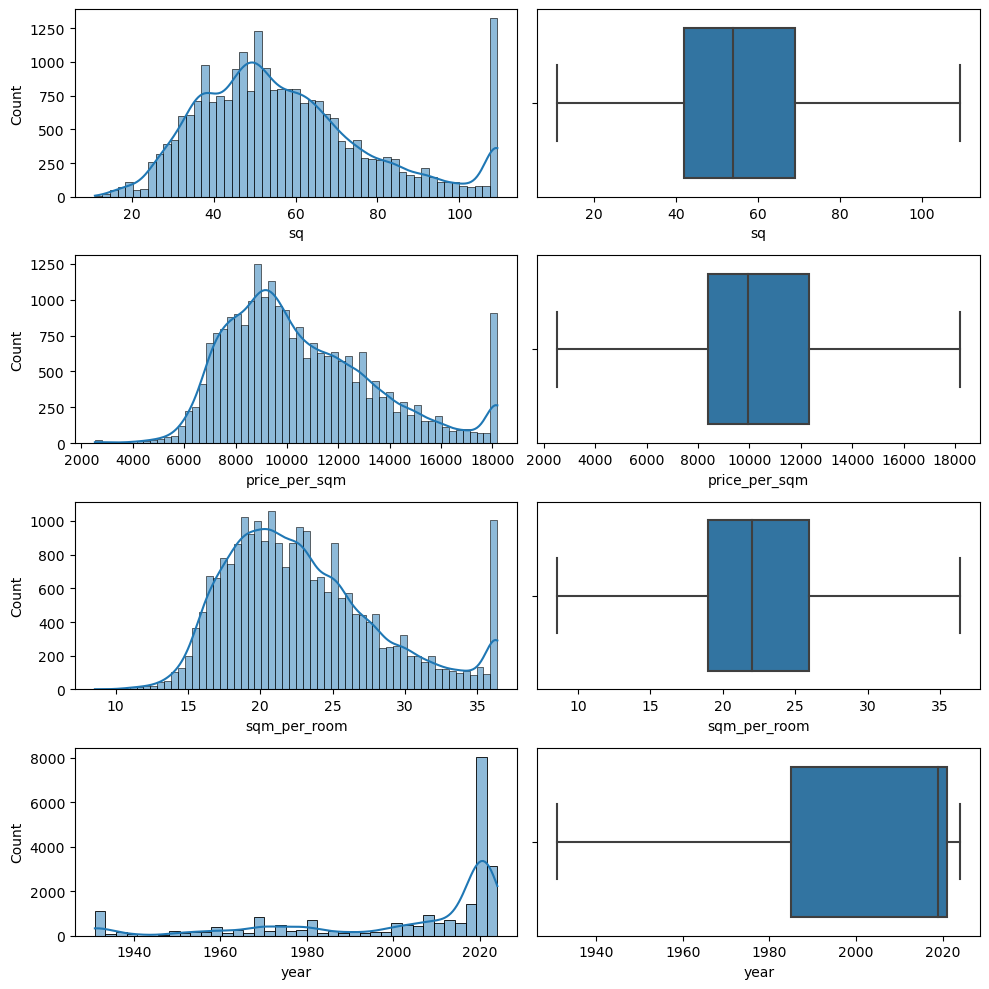

In [20]:
fig, ax = plt.subplots(4,2, figsize=(10,10))
sns.histplot(x=df['sq'], data=df, kde=True, ax=ax[0,0])
sns.boxplot(x=df['sq'], data=df, ax=ax[0,1])
sns.histplot(x=df['price_per_sqm'], data=df, kde=True, ax=ax[1,0])
sns.boxplot(x=df['price_per_sqm'], data=df, ax=ax[1,1])
sns.histplot(x=df['sqm_per_room'], data=df, kde=True, ax=ax[2,0])
sns.boxplot(x=df['sqm_per_room'], data=df, ax=ax[2,1])
sns.histplot(x=df['year'], data=df, kde=True, ax=ax[3,0])
sns.boxplot(x=df['year'], data=df, ax=ax[3,1])
fig.tight_layout()
fig.show()

In [21]:
def city_name(row):
    if row == 'Poznañ':
        return 'Poznan'
    elif row == 'Kraków':
        return 'Krakow'
    else:
        return 'Warszawa'

df['city'] = df['city'].apply(lambda x: city_name(x))

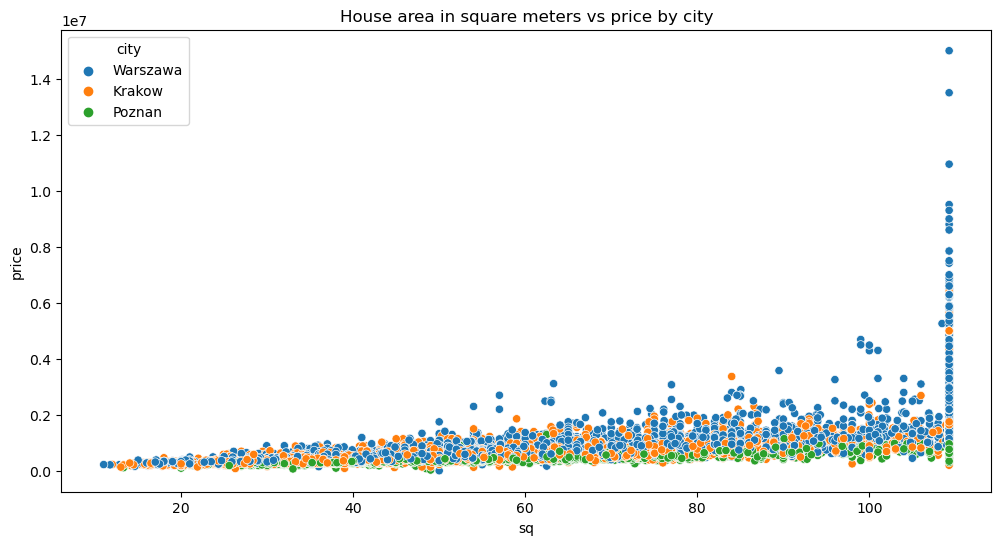

In [22]:
plt.figure(figsize=(12,6))
plt.title("House area in square meters vs price by city")
sns.scatterplot(x='sq', y='price', data=df, hue='city', hue_order = ['Warszawa', 'Krakow', 'Poznan'])
plt.show()

Time for ML model for price prediction, I have decided to use the XGBoost for Regression

but first let's copy our data before spliting it

In [23]:
df2 = df.copy()

In [24]:
dummies = pd.get_dummies(df2['city'])
df2 = pd.concat([df2, dummies], axis=1)
df2.drop(['address', 'city', 'price_per_sqm', 'sqm_per_room'], axis=1, inplace=True)
df2.head()

,floor,latitude,longitude,price,rooms,sq,year,Krakow,Poznan,Warszawa
0,2,50.049224,19.970379,749000.0,3,74.050,2021.0,1,0,0
1,3,52.249775,21.106886,240548.0,1,24.380,2021.0,0,0,1
2,2,50.066964,19.920025,427000.0,2,37.000,1970.0,1,0,0
3,2,52.404212,16.882542,1290000.0,5,109.275,1935.0,0,1,0
4,1,52.212225,20.972630,996000.0,5,105.000,2020.0,0,0,1


In [25]:
X = df2.drop('price', axis=1)
y = df2['price']

In [26]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=5)

In [27]:
model = XGBRegressor(random_state=42)


model.fit(X_train, y_train)
    

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [28]:
def get_score_xgb(n_estimators):
    xgb = XGBRegressor(n_estimators=n_estimators,
                       learning_rate=0.04, 
                       n_jobs=4, 
                       random_state=42)
    
    xgb.fit(X_train, y_train)
    
    return xgb.score(X_test, y_test)

In [29]:
results_xgb = {}
estimators = [1000, 1300, 1500, 1700, 1900]

for i in estimators:
    results_xgb[i] = get_score_xgb(i)
    print(f"Fitted XGB with {i} estimators")

Fitted XGB with 1000 estimators
Fitted XGB with 1300 estimators
Fitted XGB with 1500 estimators
Fitted XGB with 1700 estimators
Fitted XGB with 1900 estimators


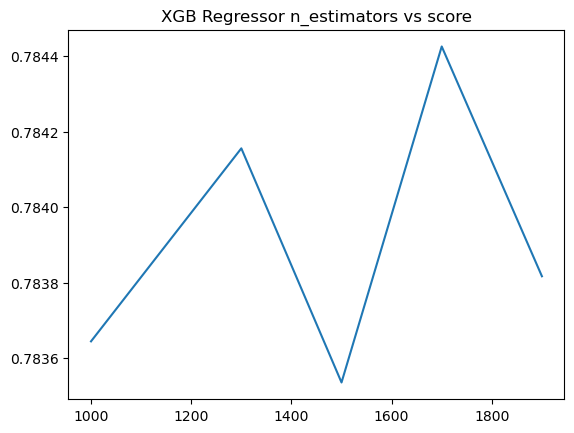

In [30]:
plt.plot(list(results_xgb.keys()), list(results_xgb.values()))
plt.title("XGB Regressor n_estimators vs score")
plt.show()

Here we test our model

In [31]:
model = XGBRegressor(n_estimators=1700, learning_rate=0.04, n_jobs=4, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Final Model MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"Final Model R^2: {model.score(X_test, y_test):.4f}")

Final Model MAE: 81081.0741
Final Model R^2: 0.7844


results of the tested model are decent, but let's visualise it's prediction error

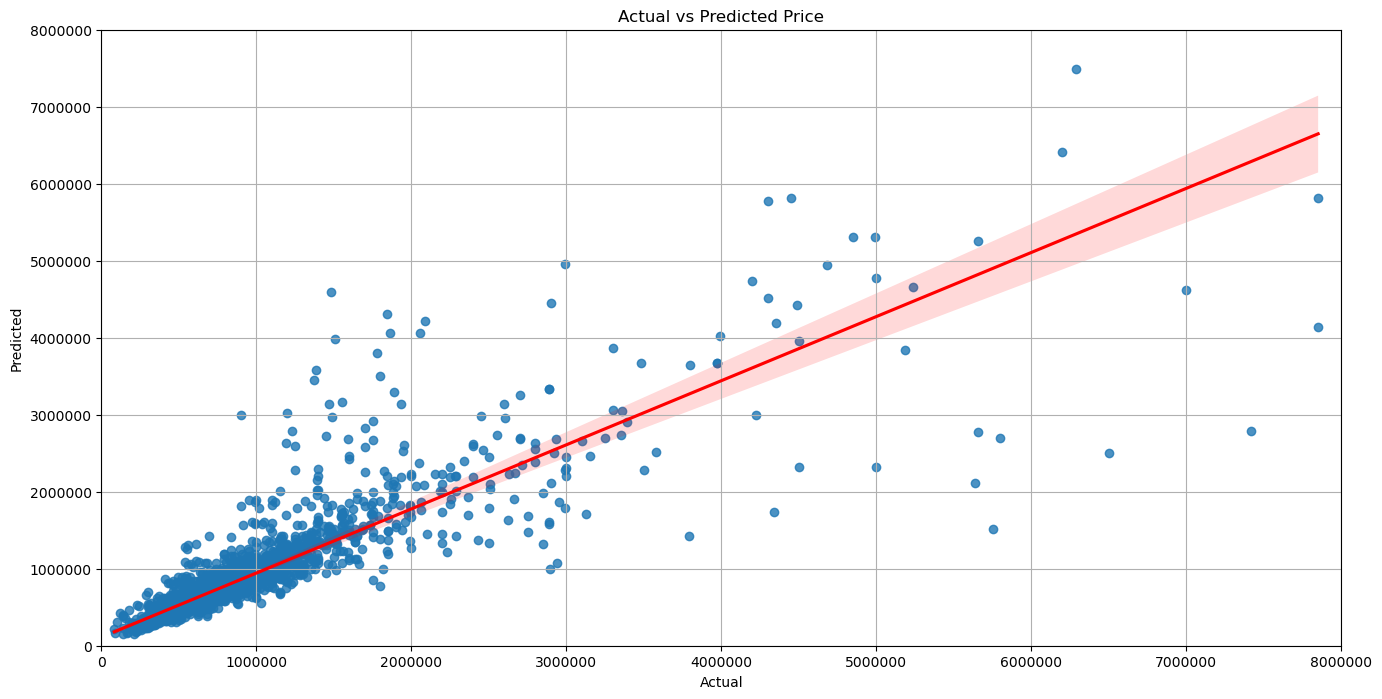

In [32]:
plt.figure(figsize=(16,8))
plt.ticklabel_format(style='plain')
sns.regplot(x=y_test, y=y_pred, line_kws={"color": "red"})
plt.title("Actual vs Predicted Price")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.xlim(0, 8000000)
plt.ylim(0, 8000000)
plt.grid(True)
plt.subplot()
plt.show()

As we can see, the model does pretty good job when it comes to predicting prices, it indeed misses it's prediction with houses with higher price, but I think it may occure due to the fact that some luxurious real estates may be expensive to features that we have not considered like expensive home furnishings, fancy neighbourhood and many more ascpescts that I can't think about right now